In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


**Data Collection**

In [ ]:
df = pd.read_csv('/content/sample_data/motor_data.csv')
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


**Univariate analysis**

<Axes: xlabel='profile_id'>

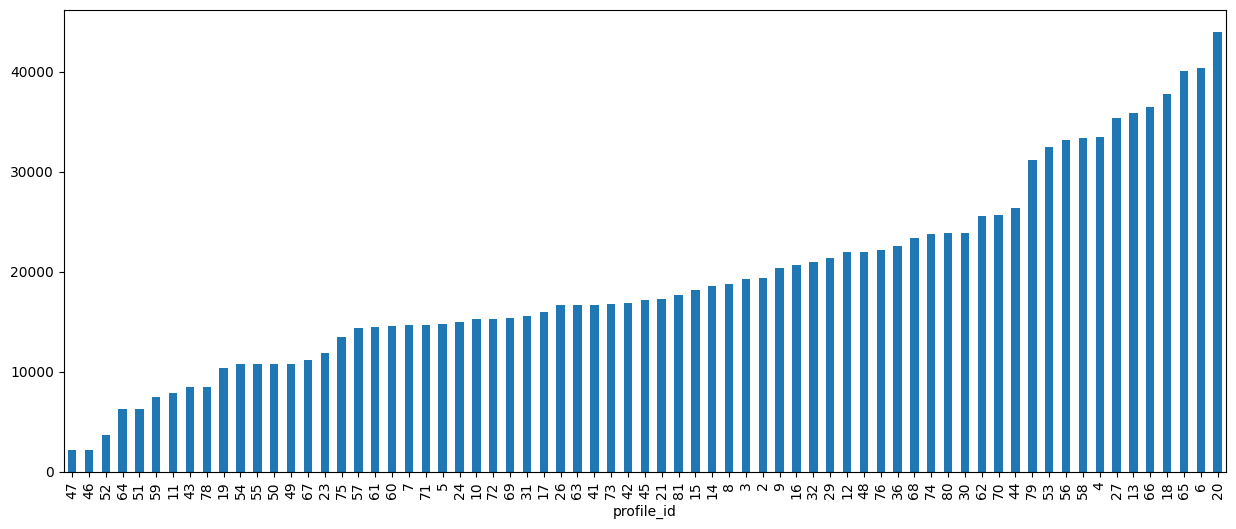

In [ ]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')

In [ ]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

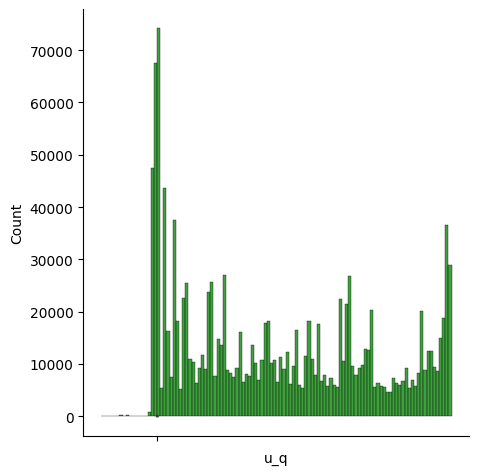

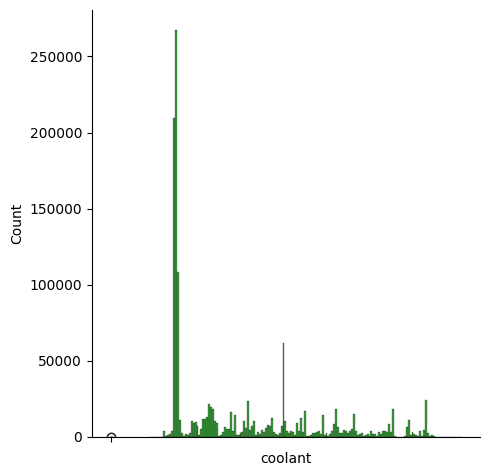

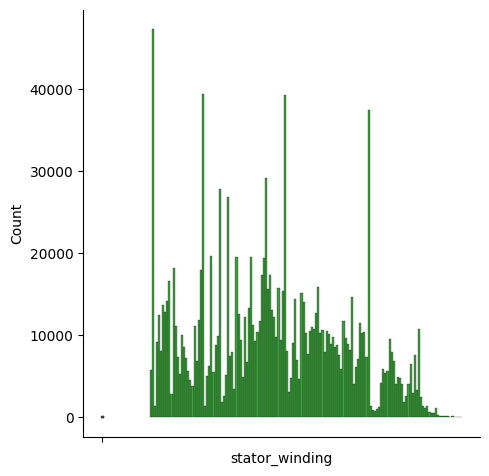

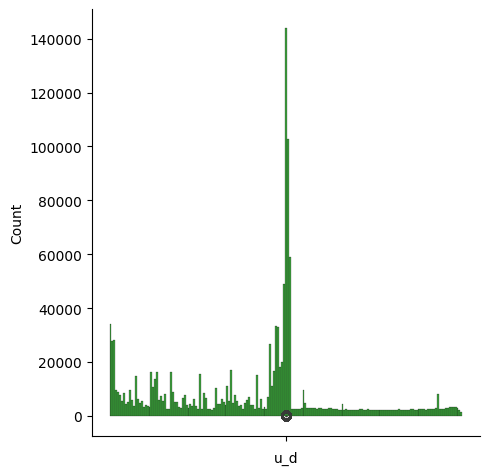

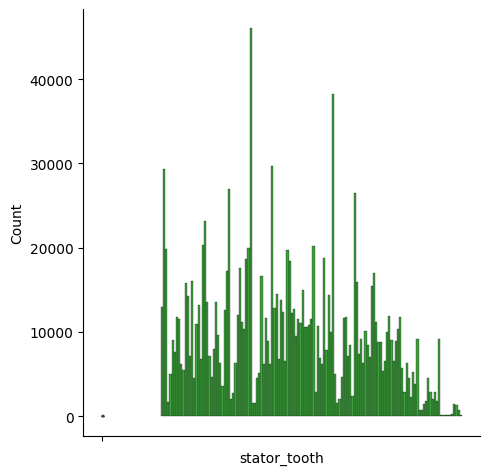

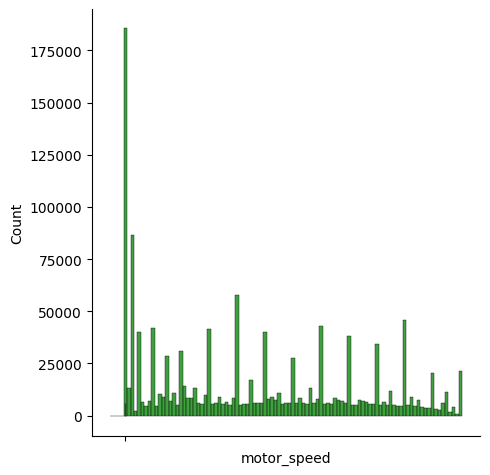

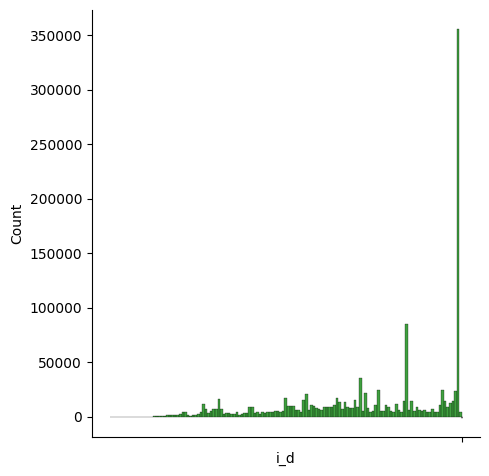

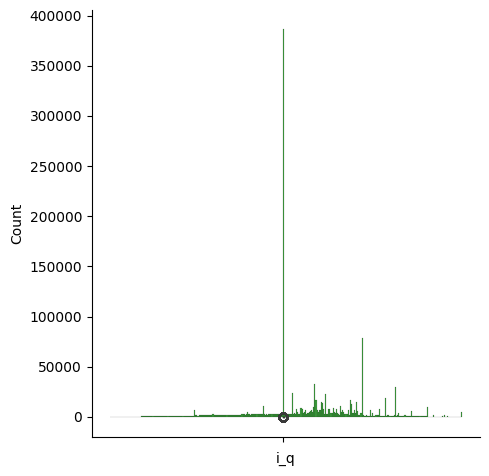

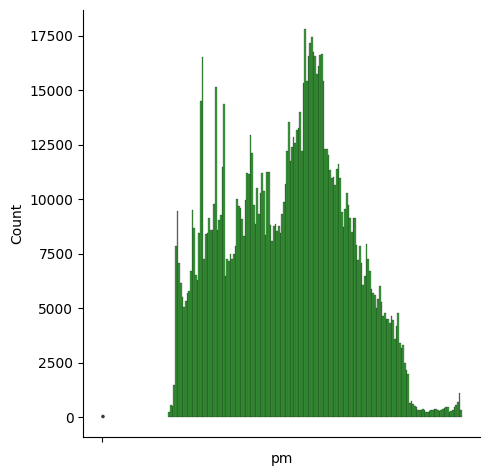

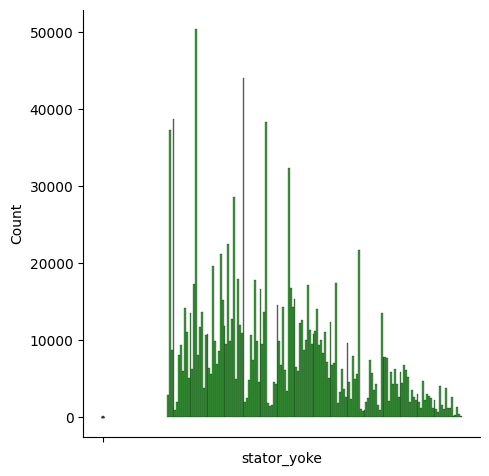

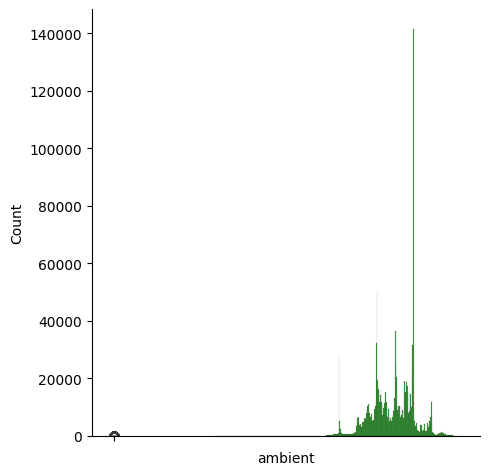

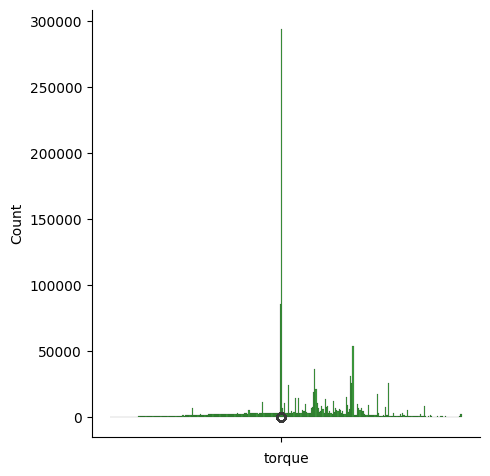

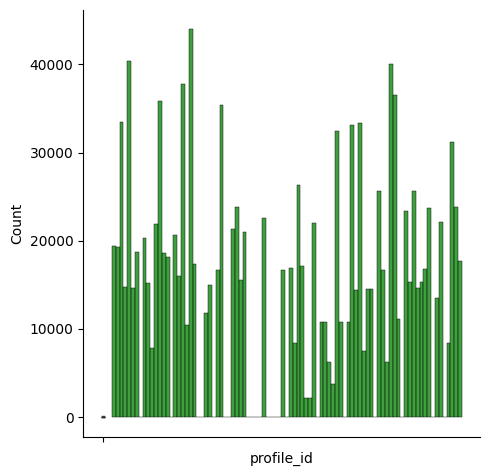

In [ ]:
for i in df.columns:
    sns.displot(df[i],color='g')
    sns.boxplot(df[i], color = 'y')
    plt.vlines(df[i].mean(),ymin = -1,ymax = 1, color = 'r')#drawing the mean Line
    plt.show()

**Multi-variate analysis**

<Axes: xlabel='i_q', ylabel='pm'>

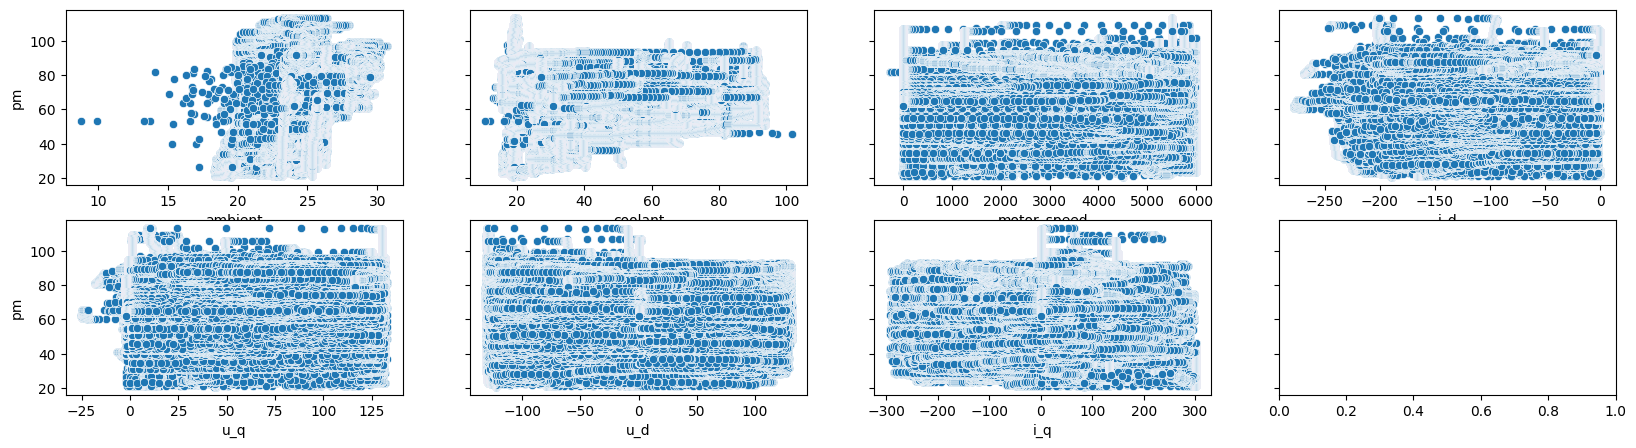

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5), sharey=True)

sns.scatterplot(x=df['ambient'], y=df['pm'], ax=axes[0][0])
sns.scatterplot(x=df['coolant'], y=df['pm'], ax=axes[0][1])
sns.scatterplot(x=df['motor_speed'], y=df['pm'], ax=axes[0][2])
sns.scatterplot(x=df['i_d'], y=df['pm'], ax=axes[0][3])
sns.scatterplot(x=df['u_q'], y=df['pm'], ax=axes[1][0])
sns.scatterplot(x=df['u_d'], y=df['pm'], ax=axes[1][1])
sns.scatterplot(x=df['i_q'], y=df['pm'], ax=axes[1][2])

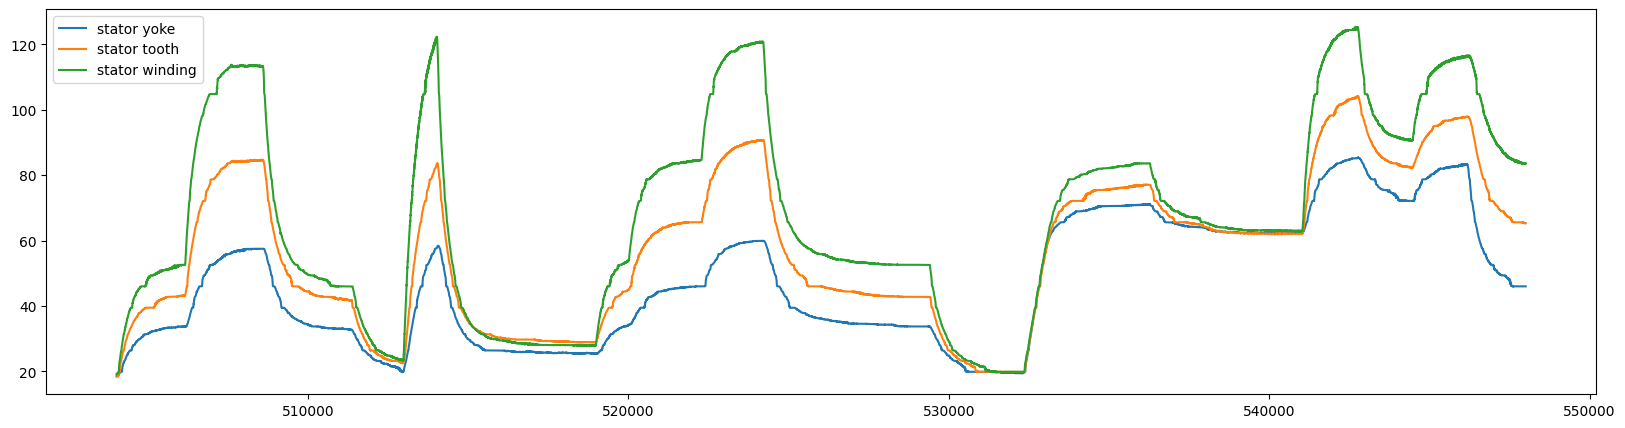

In [ ]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20] ['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20] ['stator_winding'].plot(label = 'stator winding')
plt.legend();

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
dtypes: float64(12)
memory usage: 121.8 MB


In [ ]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02


**Data Pre processing**

In [ ]:
x = df.drop(columns=['stator_winding', 'stator_yoke', 'stator_tooth', 'pm', 'torque'])
y = df[['stator_winding', 'stator_yoke', 'stator_tooth', 'pm']]

In [ ]:
x

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,19.850691
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,19.850672
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,19.850657
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,19.850647
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,19.850639
...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,0.791801,0.000380,-2.000169,1.097528,23.989078
1330812,-2.258684,30.721306,0.778900,0.002985,-2.000499,1.097569,23.970700
1330813,-2.130312,30.721312,0.804914,0.002301,-1.999268,1.098765,23.977234
1330814,-2.268498,30.721316,0.763091,0.005662,-2.000999,1.095696,24.001421


In [ ]:
y

,stator_winding,stator_yoke,stator_tooth,pm
0,19.086670,18.316547,18.293219,24.554214
1,19.092390,18.314955,18.294807,24.538078
2,19.089380,18.326307,18.294094,24.544693
3,19.083031,18.330833,18.292542,24.554018
4,19.082525,18.326662,18.291428,24.565397
...,...,...,...,...
1330811,45.274497,38.653720,41.934347,62.147780
1330812,45.239017,38.656328,41.868923,62.142646
1330813,45.211576,38.650923,41.804819,62.138387
1330814,45.193508,38.655686,41.762220,62.133422


In [ ]:
df.isnull().sum()

,0
u_q,0
coolant,0
stator_winding,0
u_d,0
stator_tooth,0
motor_speed,0
i_d,0
i_q,0
pm,0
stator_yoke,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1064652, 7)
(266164, 7)
(1064652, 4)
(266164, 4)


**Model Building**

1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def linear_regression(x_train, y_train, x_test, y_test):
  model = LinearRegression()
  model.fit(x_train, y_train)
  y_predicted = model.predict(x_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
  r2 = r2_score(y_test, y_predicted)

  print(f"Root Mean Squared Error : {rmse}")
  print(f"R-squared score : {r2}")

  return model,y_predicted

In [ ]:
model, y_predicted = linear_regression(x_train, y_train, x_test, y_test)

Root Mean Squared Error : 11.880133214968662
R-squared score : 0.7335520602161623


2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
def decision_tree(x_train, y_train, x_test, y_test):
  model = DecisionTreeRegressor()
  model.fit(x_train, y_train)
  y_predicted = model.predict(x_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
  r2  = r2_score(y_test, y_predicted)

  print(f"Root Mean Squared Error : {rmse}")
  print(f"R-squared Score : {r2}")

  return model, y_predicted

In [ ]:
model, y_predicted = decision_tree(x_train, y_train, x_test, y_test)

Root Mean Squared Error : 3.0752304080168256
R-squared Score : 0.9830806595339632


3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def random_forest(x_train, y_train, x_test, y_test, n_estimators = 2):
  model = RandomForestRegressor()
  model.fit(x_train, y_train)
  y_predicted = model.predict(x_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
  r2 = r2_score(y_test, y_predicted)

  print(f"Root Mean Squared Error : {rmse}")
  print(f"R-squared Score : {r2}")

  return model, y_predicted

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Ir=LinearRegression()
dr=DecisionTreeRegressor()
rf =RandomForestRegressor()
svm =SVR()

Decision tree gives the 98% score we will choose it !

In [ ]:
import joblib

In [ ]:
joblib.dump(dr,"model.save")

['model.save']

In [ ]:
from google.colab import files
files.download("model.save")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>